# Exam for evaluating ML skills needed for Trantor: Exercise I

### Below there are a number of examples and exercises. The goal of the exam is completing as many  of the exercises as possible. The candidates could create an auxiliary .py file and read from the notebook in order to avoid excess of text. 
### It is highly recommended to create modular code in order to reuse it for the different exercises. The capacity to create modular, self-explanatory, and clean code  that could be used accross tasks will be highly appreciated.
### Short comments could be added to explain the choice of the ML model or algorithm, as well as references to papers where a similar solution is used for a related problem.

In [1]:
# We import some python libraries to be used in the notebook
#The candidate should have these libraries installed in order to execute the notebook

import pandas as pd
import glob, os
import matplotlib.pyplot as plt
from transformers import pipeline


C:\Users\Asus\anaconda3\envs\pyspark\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


### A number of datasets will be used for the evaluation. In particular, a set of files containing "topics" in different languages will be used. The use of these file is restricted to the completion of this exam. 
### The provided topics should be in the directory assigned to the variable "path" in the following cell. 



In [2]:
### Reads all the pickle files in "path" with information about the topics
# You will need to download the following file:
# https://drive.google.com/file/d/1wzZgN_pcDTEa50ZUwZgDGmRbLajOXH-W/view?usp=sharing
path = 'individualTopics_27-01-22/'
all_records = []

for fname in glob.glob(path+'*.pickle'):
    print(fname)
    obj = pd.read_pickle(fname)
    record = [obj['id'],obj['name'],obj['audience_size'],
              obj['country'],obj['topic']]
    all_records = all_records + [record]

individualTopics_27-01-22\#Te Amo.pickle
individualTopics_27-01-22\(500) Days of Summer.pickle
individualTopics_27-01-22\1 LIVE.pickle
individualTopics_27-01-22\1&1 Internet.pickle
individualTopics_27-01-22\1-800-Flowers.pickle
individualTopics_27-01-22\1. F.C. Colonia.pickle
individualTopics_27-01-22\1. FSV Mainz 05.pickle
individualTopics_27-01-22\10 000 a. C..pickle
individualTopics_27-01-22\10 000 metros.pickle
individualTopics_27-01-22\10 Barrel Brewing Company.pickle
individualTopics_27-01-22\10 de Downing Street.pickle
individualTopics_27-01-22\10 Things I Hate About You (serie de televisión).pickle
individualTopics_27-01-22\10 Years.pickle
individualTopics_27-01-22\100 latinos dijeron.pickle
individualTopics_27-01-22\100 metros vallas.pickle
individualTopics_27-01-22\100 metros.pickle
individualTopics_27-01-22\100 mexicanos dijeron.pickle
individualTopics_27-01-22\1000 km de Bathurst.pickle
individualTopics_27-01-22\101 Dalmatians.pickle
individualTopics_27-01-22\101 dálmatas.p

### Transforms the topics records into dataframe

In [3]:
df = pd.DataFrame.from_records(all_records)
df.columns = ['id','name','audience_size','country','topic']
df

,id,name,audience_size,country,topic
0,6003407352218,#Te Amo,38302730,None,None
1,6003195700298,(500) Days of Summer,456210,None,None
2,6002964102317,1 LIVE,1333240,None,None
3,6003305598969,1&1 Internet,1372910,None,None
4,6003311804999,1-800-Flowers,1816950,None,None
...,...,...,...,...,...
25391,6011703428298,엔제리너스커피(Angelinus Coffee),8,None,None
25392,6018395661890,오늘 뭐 먹지?,4865090,None,None
25393,6011929220692,인천공항 incheon airport,564660,None,None
25394,6015801032961,케이투 아웃도어 (K2 OUTDOOR),159660,None,None


### Extracts the text describing the topics 

In [4]:
the_topics = [name for name in df['name']]

In [5]:
the_topics

['#Te Amo',
 '(500) Days of Summer',
 '1 LIVE',
 '1&1 Internet',
 '1-800-Flowers',
 '1. F.C. Colonia',
 '1. FSV Mainz 05',
 '10 000 a. C.',
 '10 000 metros',
 '10 Barrel Brewing Company',
 '10 de Downing Street',
 '10 Things I Hate About You (serie de televisión)',
 '10 Years',
 '100 latinos dijeron',
 '100 metros vallas',
 '100 metros',
 '100 mexicanos dijeron',
 '1000 km de Bathurst',
 '101 Dalmatians',
 '101 dálmatas',
 '101 YüzBir Okey Plus',
 '102.7 KIIS FM',
 '109',
 '10K run',
 '110 metros vallas',
 '112',
 '12 años de esclavitud',
 '1200 Micrograms',
 '12th Planet (musician)',
 '13 Going on 30',
 '1408',
 '1500 metros',
 '16 and Pregnant',
 '16 bits',
 '1664 France',
 '1800 Tequila',
 '19 Kids and Counting',
 '1970s in music',
 '1990s in fashion',
 '2 Broke Girls',
 '2 Chainz',
 '2 Guns',
 '2 Unlimited',
 '2(x)ist',
 '2-step garage',
 '2. Bundesliga',
 '20 Feet from Stardom',
 '200 metros',
 '2000 AD',
 '2001 space odyssey',
 '2009 Indian Premier League',
 '2012 Philadelphia Ea

# EXERCISE 1

### The list "the_topics" contains a list of short sentences in different languages. Stating from this list, complete the following tasks:

1.1) Create a list of lists A=[[n_letters_1, n_words_1, n_verbs_1],[n_letters_2, n_words_2, n_verbs_2], ...,
[n_letters_k, n_words_k, n_verbs_k] ], where:

-n_letters_i: Is the number of letters (excluding spaces and punctuation symbols) in sentence i

-n_words_i: Is the number of words in  sentence i

-n_verbs_i: Is the number of verbs in  sentence i (for sentences in languages other than English, this value is not relevant (you may either set it to zero or leave an incorrect value). 

1.2) Visualize as a figure the wordcloud (https://en.wikipedia.org/wiki/Tag_cloud) of the corpus comprising all the sentences in "the_topics".

1.3) A named entity is a “real-world object” that’s assigned a name - for example, a person, a country, a product or a book-. Create a new list with all sentences in "the_topics" that contain at least one geopolitical entity (eg., countries, cities, states)

1.4) Compute the semantic similarity of each topics to the following sentence "Jeu de Paume is an excellent art gallery in Paris".  Rank the sentences the computed values of the semantic similarity. The top ranked sentence from the_topics is the one with closest similarity to the given sentence. You may use any method or algorithm to compute this ranking. The output of this exercise could be the index of each word in the ranking, or a new list "ranked_topics".




SUGGESTIONS: You may use libraries spacy, nltk, sklearn, worldcloud or any other library from python to solve these exercises.


In [6]:
from __future__ import unicode_literals
import spacy,en_core_web_sm
from spacy.lang.en import English
from spacy.matcher import Matcher
import textacy
import string
from wordcloud import WordCloud, STOPWORDS 
import numpy as np

In [22]:
class trantor():

    def __init__(self, the_topics):
        self.the_topics = the_topics
#  remove punctuation  
    def remove_punctuation(self, text):
        text = text.translate(str.maketrans('', '', string.punctuation))
        return text
# number of verb in each row 
    def number_of_verb(self, string):
        verbs = []
        pattern = [{'POS': 'VERB', 'OP': '?'},\
               {'POS': 'VERB', 'OP': '+'}]
        doc = textacy.make_spacy_doc(string, lang='en_core_web_sm')
        lists = textacy.extract.matches.token_matches(doc, [pattern])
        for list in lists:
            verbs.append(list.text)
        return [len(verbs)]
#  number of words in each row
    def numb_of_words(self, text):
        text = text.split()
        return [len(text)]

# number of letter in each row
    def number_letters(self, text):
        text = len([i for i in text if i.isalpha()])
        return [text]
# list with number of verb, letter and word of each row    
    def list_1(a,b,c):
        a = np.array(a)
        b = np.array(b)
        c = np.array(c)
        return np.concatenate((a,b,c), axis = 1).tolist()

# wordcloud of the_topics

    def word_cloud(text):
        comment_words = ''
        stopwords = set(STOPWORDS)
        for val in text:

            # typecaste each val to string
            val = str(val)

            # split the value
            tokens = val.split()

            # Converts each token into lowercase
            for i in range(len(tokens)):
                tokens[i] = tokens[i].lower()

            comment_words += " ".join(tokens)+" "

        wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)

        # plot the WordCloud image                      
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)

        plt.show()

In [8]:
trantor = trantor(the_topics)

In [9]:
non_punctuation = [trantor.remove_punctuation(i) for i in the_topics]
number_of_verb = [trantor.number_of_verb(i) for i in the_topics]
number_words = [trantor.numb_of_words(i) for i in non_punctuation]
number_letters = [trantor.number_letters(i) for i in the_topics]

In [20]:
A = trantor.list_1(number_letters,number_words,number_of_verb)
A

[[5, 2, 0],
 [12, 4, 0],
 [4, 2, 0],
 [8, 2, 0],
 [7, 1, 0],
 [9, 3, 0],
 [8, 4, 0],
 [2, 4, 0],
 [6, 3, 0],
 [20, 4, 0],
 [15, 4, 0],
 [36, 9, 1],
 [5, 2, 0],
 [14, 3, 0],
 [12, 3, 0],
 [6, 2, 0],
 [16, 3, 0],
 [12, 4, 0],
 [10, 2, 0],
 [8, 2, 0],
 [14, 4, 0],
 [6, 3, 0],
 [0, 1, 0],
 [4, 2, 0],
 [12, 3, 0],
 [0, 1, 0],
 [16, 4, 0],
 [10, 2, 0],
 [16, 3, 0],
 [7, 4, 1],
 [0, 1, 0],
 [6, 2, 0],
 [11, 3, 0],
 [4, 2, 0],
 [6, 2, 0],
 [7, 2, 0],
 [15, 4, 0],
 [8, 3, 0],
 [10, 3, 0],
 [10, 3, 0],
 [6, 2, 0],
 [4, 2, 0],
 [9, 2, 0],
 [4, 1, 0],
 [10, 2, 0],
 [10, 2, 0],
 [15, 4, 0],
 [6, 2, 0],
 [2, 2, 0],
 [12, 3, 0],
 [19, 4, 0],
 [24, 4, 0],
 [24, 4, 0],
 [24, 4, 0],
 [29, 5, 0],
 [12, 3, 0],
 [9, 2, 0],
 [6, 2, 0],
 [18, 4, 0],
 [12, 3, 0],
 [10, 3, 0],
 [9, 4, 0],
 [13, 5, 0],
 [18, 4, 0],
 [11, 3, 0],
 [15, 4, 0],
 [4, 1, 0],
 [6, 2, 0],
 [7, 2, 0],
 [9, 3, 0],
 [4, 2, 0],
 [6, 1, 0],
 [10, 2, 0],
 [6, 2, 0],
 [3, 2, 0],
 [7, 1, 0],
 [2, 1, 0],
 [2, 1, 0],
 [9, 3, 0],
 [6, 2, 0],
 [7,

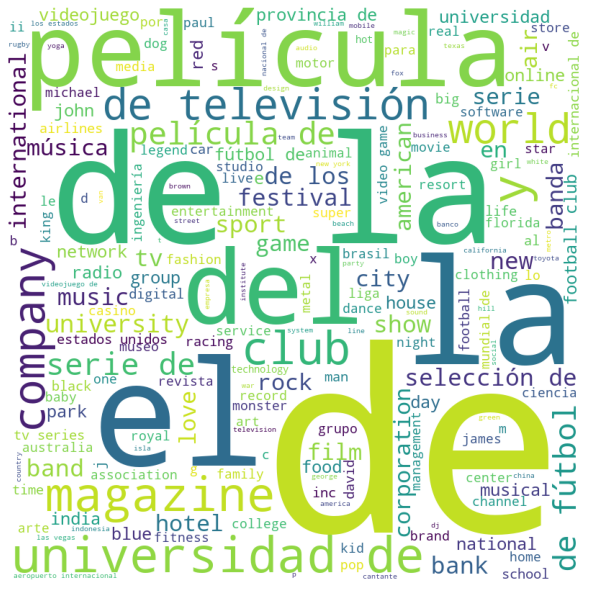

In [23]:
trantor.word_cloud(the_topics)